In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg

Dimensions of image:  (303, 384)
Maximum value:  252
Minimum value:  1


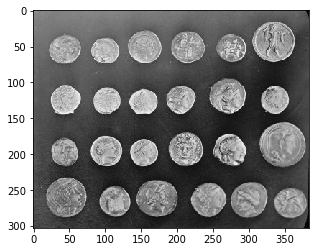

In [2]:
from skimage import data

coin = data.coins()
print('Dimensions of image: ', coin.shape)
print('Maximum value: ', coin.max())
print('Minimum value: ', coin.min())

plt.imshow(coin,cmap='gray')
plt.show()

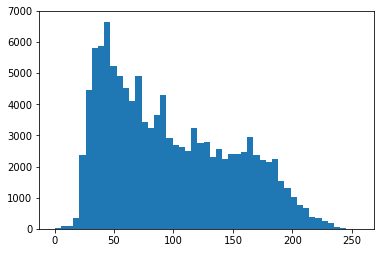

In [3]:
plt.hist(coin.ravel(),bins=np.linspace(0, 256))
plt.show()

new max value is:  1.0


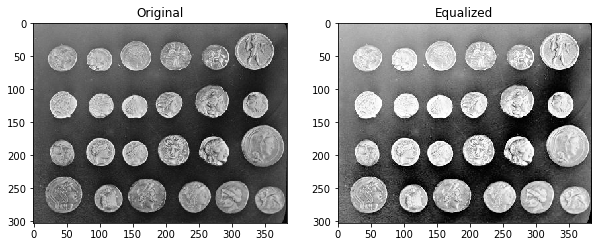

In [4]:
from skimage import exposure

coinEq = exposure.equalize_hist(coin)
print('new max value is: ', coinEq.max())

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.gca().set_title('Original')
plt.imshow(coin,cmap='gray')
plt.subplot(122)
plt.gca().set_title('Equalized')
plt.imshow(coinEq,cmap='gray')

plt.show()

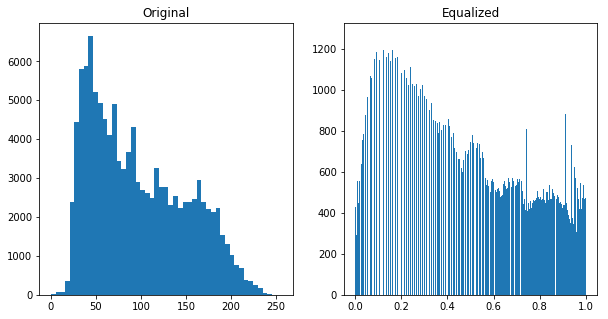

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.gca().set_title('Original')
plt.hist(coin.ravel(),bins=np.linspace(0, 256))
plt.subplot(122)
plt.gca().set_title('Equalized')
plt.hist(coinEq.ravel(),bins=np.linspace(0, 1,256))

plt.show()

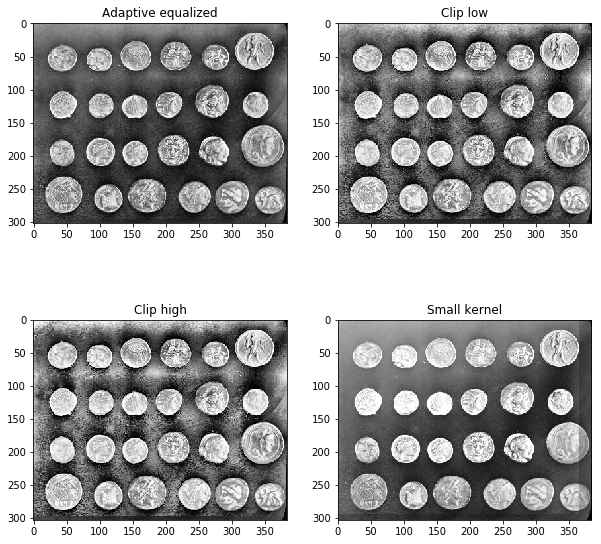

In [6]:
coinAdaptEq_default = exposure.equalize_adapthist(coin)
coinAdaptEq_clipLow = exposure.equalize_adapthist(coin, clip_limit=0.03)
coinAdaptEq_clipHigh = exposure.equalize_adapthist(coin, clip_limit=0.8)
coinAdaptEq_Kernal = exposure.equalize_adapthist(coin, kernel_size=15)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.gca().set_title('Adaptive equalized')
plt.imshow(coinAdaptEq_default,cmap='gray')
plt.subplot(222)
plt.gca().set_title('Clip low')
plt.imshow(coinAdaptEq_clipLow,cmap='gray')
plt.subplot(223)
plt.gca().set_title('Clip high')
plt.imshow(coinAdaptEq_clipHigh,cmap='gray')
plt.subplot(224)
plt.gca().set_title('Small kernel')
plt.imshow(coinAdaptEq_Kernal,cmap='gray')

plt.show()

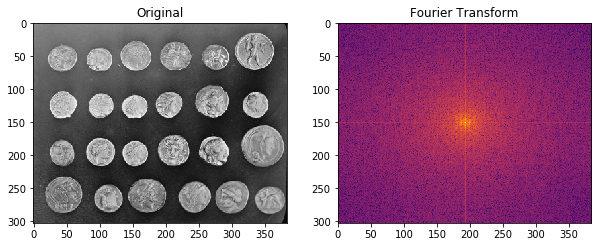

In [7]:
freqImage = np.fft.fftshift(np.fft.fft2(coin))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.gca().set_title('Original')
plt.imshow(coin,cmap='gray')
plt.subplot(122)
plt.gca().set_title('Fourier Transform')
plt.imshow(np.log(np.abs(freqImage)),cmap='inferno')

plt.show()



In [8]:
def lowPassFilter(imIn, radius):
    # Function for low pass filtering an image using a binary mask
    
    fourierIm = np.fft.fftshift(np.fft.fft2(imIn))
    
    x,y = imIn.shape
    centY = y/2
    centX = x/2
    yy,xx = np.indices((x,y))
    radialDist = np.sqrt((xx-centX)**2 + (yy - centY)**2)
    mask = radialDist < radius
    fourierIm[mask == 0] = 0
    filteredIm = np.abs(np.fft.ifft2(fourierIm))
    
    return filteredIm
    

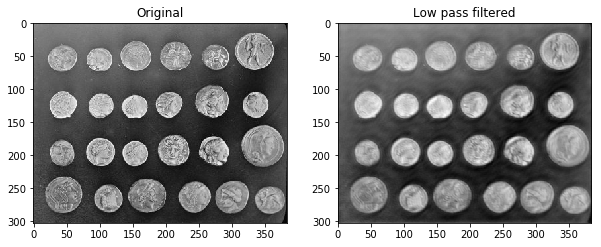

In [9]:
filteredCoin = lowPassFilter(coin, 75) 

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.gca().set_title('Original')
plt.imshow(coin,cmap='gray')
plt.subplot(122)
plt.gca().set_title('Low pass filtered')
plt.imshow(filteredCoin, cmap='gray')

plt.show()

In [10]:
def highPassFilter(imIn, radius):
    # Function for high pass filtering an image using a binary mask
    
    fourierIm = np.fft.fftshift(np.fft.fft2(imIn))
    
    x,y = imIn.shape
    centY = y/2
    centX = x/2
    yy,xx = np.indices((x,y))
    radialDist = np.sqrt((xx-centX)**2 + (yy - centY)**2)
    mask = radialDist > radius
    fourierIm[mask == 0] = 0
    filteredIm = np.abs(np.fft.ifft2(fourierIm))
    
    return filteredIm

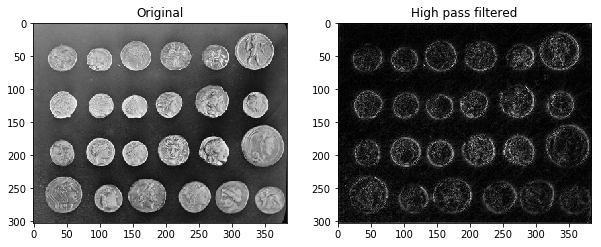

In [11]:
filteredCoin = highPassFilter(coin, 100) 

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.gca().set_title('Original')
plt.imshow(coin,cmap='gray')
plt.subplot(122)
plt.gca().set_title('High pass filtered')
plt.imshow(filteredCoin, cmap='gray')

plt.show()

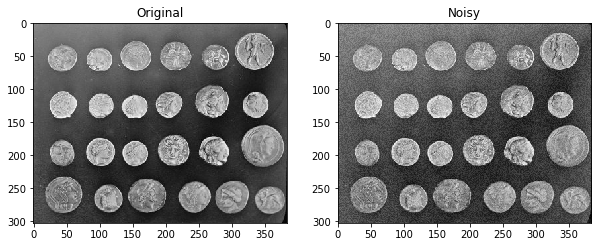

In [12]:
noise = np.random.random(coin.shape)*40
coinsNoise = coin+noise

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.gca().set_title('Original')
plt.imshow(coin,cmap='gray')
plt.subplot(122)
plt.gca().set_title('Noisy')
plt.imshow(coinsNoise, cmap='gray')

plt.show()



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


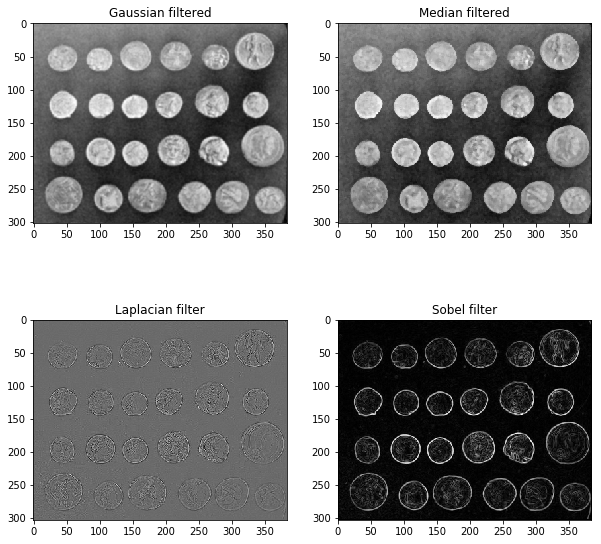

In [13]:
from skimage.filters import gaussian, laplace, sobel, median
from skimage.morphology import disk

coinsGauss = gaussian(coinsNoise, sigma=1)
coinsMed = median(coinsNoise/coinsNoise.max(), disk(2.5))
coinsLaplace = laplace(coin, ksize=3)
coinsSobel = sobel(coin)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.gca().set_title('Gaussian filtered')
plt.imshow(coinsGauss,cmap='gray')
plt.subplot(222)
plt.gca().set_title('Median filtered')
plt.imshow(coinsMed,cmap='gray')
plt.subplot(223)
plt.gca().set_title('Laplacian filter')
plt.imshow(coinsLaplace,cmap='gray')
plt.subplot(224)
plt.gca().set_title('Sobel filter')
plt.imshow(coinsSobel,cmap='gray')

plt.show()

In [14]:
from skimage.restoration import denoise_tv_chambolle, denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(coinsNoise, multichannel=False))
patch_kw = dict(patch_size=5, patch_distance=6, multichannel=False)

coinsNl = denoise_nl_means(coinsNoise, h=0.6 * sigma_est, 
                           sigma=sigma_est, fast_mode=True, **patch_kw)

coinsTV = denoise_tv_chambolle(coinsNoise, weight=0.8, n_iter_max=200)



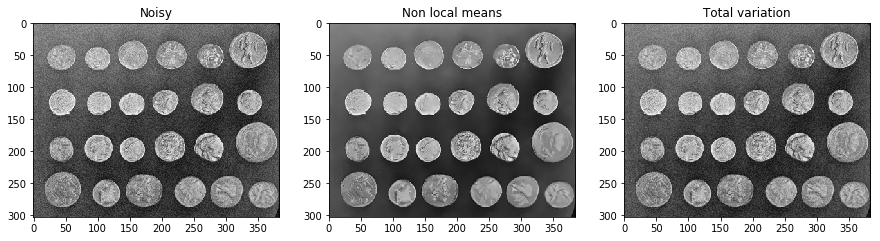

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('Noisy')
plt.imshow(coinsNoise,cmap='gray')
plt.subplot(132)
plt.gca().set_title('Non local means')
plt.imshow(coinsNl, cmap='gray')
plt.subplot(133)
plt.gca().set_title('Total variation')
plt.imshow(coinsTV, cmap='gray')
plt.show()

In [16]:
from skimage.filters import threshold_otsu, rank

threshGlobal = threshold_otsu(coinAdaptEq_default)
selem = disk(50)
threshLocal = rank.otsu(coin, selem)

coinsGlobal = coinAdaptEq_default > threshGlobal
coinsLocal = coin > threshLocal


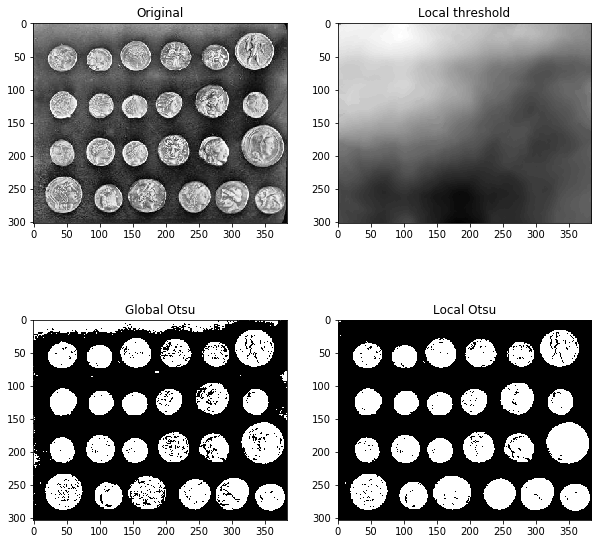

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.gca().set_title('Original')
plt.imshow(coinAdaptEq_default,cmap='gray')
plt.subplot(222)
plt.gca().set_title('Local threshold')
plt.imshow(threshLocal,cmap='gray')
plt.subplot(223)
plt.gca().set_title('Global Otsu')
plt.imshow(coinsGlobal,cmap='gray')
plt.subplot(224)
plt.gca().set_title('Local Otsu')
plt.imshow(coinsLocal,cmap='gray')

plt.show()

There are 24 coins


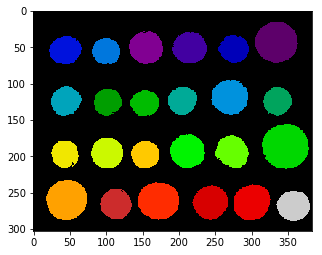

In [18]:
from skimage.morphology import remove_small_objects, remove_small_holes
from scipy.ndimage import label 

coinsSeg = remove_small_objects(remove_small_holes(coinsLocal))
coinLabels, nbLabels = label(coinsSeg)
print("There are %d coins" % nbLabels)

plt.figure(figsize=(5,5))
plt.imshow(coinLabels,cmap='nipy_spectral')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


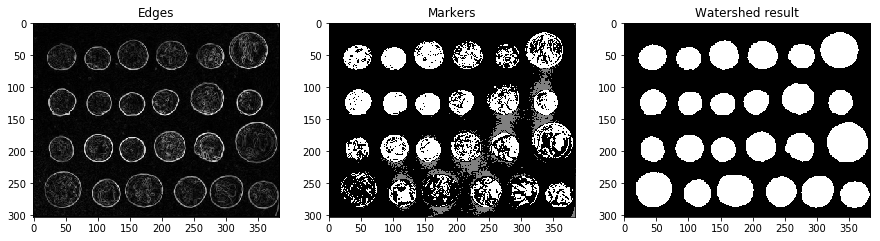

In [19]:
from skimage.morphology import watershed
coinSobel = sobel(coinAdaptEq_default*255)

markers = np.zeros_like(coin)
markers[coin < 30] = 1
markers[coin > 150] = 2

coinWs = watershed(coinSobel, markers)
coinWs = remove_small_holes(coinWs-1)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('Edges')
plt.imshow(coinsSobel,cmap='gray')
plt.subplot(132)
plt.gca().set_title('Markers')
plt.imshow(markers, cmap='gray')
plt.subplot(133)
plt.gca().set_title('Watershed result')
plt.imshow(coinWs, cmap='gray')
plt.show()

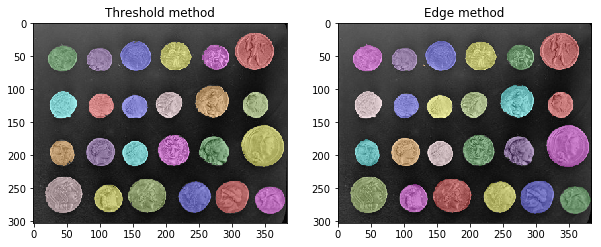

In [20]:
from skimage.color import label2rgb

wsLabel, nbLabels = label(coinWs)
seg1 = label2rgb(coinLabels, image=coin, bg_label=0)
seg2 = label2rgb(wsLabel, image=coin, bg_label=0)


plt.figure(figsize=(10,10))
plt.subplot(121)
plt.gca().set_title('Threshold method')
plt.imshow(seg1)
plt.subplot(122)
plt.gca().set_title('Edge method')
plt.imshow(seg2)

plt.show()